<a href="https://colab.research.google.com/github/gitblankhub/Baf/blob/main/%EA%B8%B0%ED%9B%84%EA%B8%B0%EC%88%A0%EB%B6%84%EB%A5%98/trials/%EA%B8%B0%ED%9B%84%EB%B6%84%EB%A5%98_0120_LSTM_(%EC%97%B0%EA%B5%AC%EB%82%B4%EC%9A%A9%EB%8F%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기후기술 분석

train.csv :
- train 데이터
- 기후기술분류 label 포함
- train.shape: (174304, 13)

test.csv :
- test 데이터
- 기후기술분류 label 미포함
- test.shape: (43576, 12)




sample_submission.csv :
- sample_submission 데이터
- sample_submission.shape: (43576, 2)


labels_mapping.csv :
- label과 기후기술분류체계를 mapping 한 meta data






https://wikidocs.net/106473


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.0 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#파일 읽기
import pandas as pd
import numpy as np


train=pd.read_csv('/content/drive/MyDrive/open/train.csv')
test=pd.read_csv('/content/drive/MyDrive/open/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/open/sample_submission.csv')
label=pd.read_csv('/content/drive/MyDrive/open/labels_mapping.csv')


In [ ]:
import re #정규화 표현식

## konlpy) kkma komoran okt

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
okt.morphs('유전정보를 활용한 새로운 해충 분류군 동정기술 개발')

['유전', '정보', '를', '활용', '한', '새로운', '해충', '분류군', '동정', '기술', '개발']

In [ ]:
train['요약문_연구내용'][1]

'1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자 선별\n2) 대장암 환자조직을 이용하여 후보 유전자의 발현과 DR 발현 양상 분석\n3) 후보 유전자 발현 조절을 이용한 표적 가능성 및 TRAIL 내성 제어 기전 규명\n4) 표적 유전자 knock out 마우스 구축 및 동물모델을 통한 후보 유전자 표적 가능성 검증\n5) 선천적 TRAIL 내성 예측인자 발굴\n\n2차년도\n1) Microarray를 통한 후천적 TRAIL 내성 표적 후보 유전자 선별  \n2) 대장암 환자조직을 이용하여 후보 유전자의 발현과 DR 발현 양상 분석\n3) 후보 유전자 발현 조절을 이용한 표적 가능성 및 TRAIL 내성 제어 기전 규명\n4) 표적 유전자 knock out 마우스 구축 및 동물모델을 통한 후보 유전자 표적 가능성 검증\n5) 후천적 TRAIL 내성 예측인자 발굴\n\n3차년도\n1) 1, 2차년도 연구결과를 토대로 선천적 내성과 후천적 내성 모두에서 조절되는 전천후 TRAIL 내성 유전자 탐색\n2) 대장암 환자조직을 이용하여 후보 유전자의 발현과 DR 발현 양상 분석\n3) 후보 유전자의 발현 변화를 통한 TRAIL 감수성 변화 및 내성 제어 기전 규명\n4) 표적 유전자 knock out 마우스 구축 및 동물모델을 통한 후보 유전자 표적 가능성 검증\n5) 선천적/후천적 TRAIL 내성 모두를 아우르는 전천후 TRAIL 내성 표지자의 발굴'

In [ ]:
print(okt.morphs(train['요약문_연구내용'][1]))

['1', '차', '년도', '\n', '1', ')', 'Microarray', '를', '통한', '선천', '적', 'TRAIL', '내', '성', '표적', '후보', '유전자', '선별', '\n', '2', ')', '대장암', '환자', '조직', '을', '이용', '하여', '후보', '유전자', '의', '발현', '과', 'DR', '발현', '양상', '분석', '\n', '3', ')', '후보', '유전자', '발현', '조절', '을', '이용', '한', '표적', '가능성', '및', 'TRAIL', '내', '성', '제어', '기전', '규명', '\n', '4', ')', '표적', '유전자', 'knock', 'out', '마우스', '구축', '및', '동물', '모델', '을', '통한', '후보', '유전자', '표적', '가능성', '검증', '\n', '5', ')', '선천', '적', 'TRAIL', '내', '성', '예측', '인자', '발굴', '\n\n', '2', '차', '년도', '\n', '1', ')', 'Microarray', '를', '통한', '후천', '적', 'TRAIL', '내', '성', '표적', '후보', '유전자', '선별', '2', ')', '대장암', '환자', '조직', '을', '이용', '하여', '후보', '유전자', '의', '발현', '과', 'DR', '발현', '양상', '분석', '\n', '3', ')', '후보', '유전자', '발현', '조절', '을', '이용', '한', '표적', '가능성', '및', 'TRAIL', '내', '성', '제어', '기전', '규명', '\n', '4', ')', '표적', '유전자', 'knock', 'out', '마우스', '구축', '및', '동물', '모델', '을', '통한', '후보', '유전자', '표적', '가능성', '검증', '\n', '5', ')', '후천', '적', 'TRAIL', '내'

In [ ]:
print(okt.nouns(train['요약문_연구내용'][1]))

['차', '년도', '를', '통한', '선천', '성', '표적', '후보', '유전자', '선별', '대장암', '환자', '조직', '이용', '후보', '유전자', '발현', '발현', '양상', '분석', '후보', '유전자', '발현', '조절', '이용', '표적', '가능성', '및', '성', '제어', '기전', '규명', '표적', '유전자', '마우스', '구축', '및', '동물', '모델', '통한', '후보', '유전자', '표적', '가능성', '검증', '선천', '성', '예측', '인자', '발굴', '차', '년도', '를', '통한', '후천', '성', '표적', '후보', '유전자', '선별', '대장암', '환자', '조직', '이용', '후보', '유전자', '발현', '발현', '양상', '분석', '후보', '유전자', '발현', '조절', '이용', '표적', '가능성', '및', '성', '제어', '기전', '규명', '표적', '유전자', '마우스', '구축', '및', '동물', '모델', '통한', '후보', '유전자', '표적', '가능성', '검증', '후천', '성', '예측', '인자', '발굴', '차', '년도', '차', '년도', '구결', '토대', '선천', '성과', '후천', '성', '모두', '조절', '천후', '성', '유전자', '탐색', '대장암', '환자', '조직', '이용', '후보', '유전자', '발현', '발현', '양상', '분석', '후보', '유전자', '발현', '변화', '통한', '감수성', '변화', '및', '성', '제어', '기전', '규명', '표적', '유전자', '마우스', '구축', '및', '동물', '모델', '통한', '후보', '유전자', '표적', '가능성', '검증', '선천', '후천', '성', '모두', '천후', '성', '표지', '자의', '발굴']


## EDA

### 결측치(train & test)

In [ ]:
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

#### *요약문_연구내용

##### 길이 len

요약문_연구내용 length 최대값 :  3999
요약문_연구내용 length 최소값 :  1
요약문_연구내용 length 평균값 :  699.2930282724435
요약문_연구내용 length 중간값 :  597.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_

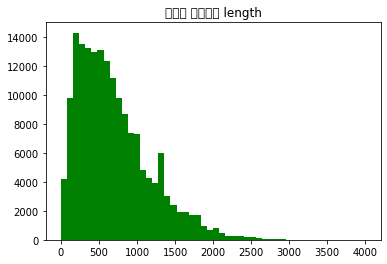

In [ ]:
plt.hist(train['요약문_연구내용'].astype(str).apply(len),bins=50,color='green')
plt.title('요약문 연구내용 length')
print("요약문_연구내용 length 최대값 : ",max(train['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 최소값 : ",min(train['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 평균값 : ",train['요약문_연구내용'].astype(str).apply(len).mean())
print("요약문_연구내용 length 중간값 : ",train['요약문_연구내용'].astype(str).apply(len).median())

In [ ]:
#na 인 행
train[train['요약문_연구내용'].isna()]


,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
34,34,2019,과학기술연합대학원대학교연구운영비지원(R&D)(운영경비),과학기술정보통신부,계속,과학기술연합대학원대학교연구운영비지원,과학기술연합대학원대학교 운영비,NaN,NaN,NaN,NaN,NaN,0
108,108,2017,한국과학기술원연구운영비지원(0.5),과학기술정보통신부,계속,글로벌교육연구선도사업,미래형융합교육프로그램운영,NaN,NaN,NaN,NaN,NaN,0
205,205,2017,지방대학육성사업(0.5),교육부,계속,지방대학 특성화사업,환경친화형 융복합 기계부품 창의 인재 양성 사업단,NaN,NaN,NaN,NaN,NaN,0
321,321,2019,국가과학기술연구회연구운영비지원(R&D)(주요사업비),과학기술정보통신부,계속,출연(연)지원육성사업,출연(연) 지원육성사업,NaN,NaN,NaN,NaN,NaN,0
328,328,2018,국민안전증진기술개발(R&D),산업통상자원부,계속,사회문제해결형 다부처공동사업,2017 사회문제해결형R&D 다부처 공동시범사업(평가관리),NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174139,174139,2016,소재부품산업기술개발기반구축,산업통상자원부,계속,기획평가관리비,소재부품산업기술개발기반구축 평가관리비,NaN,NaN,NaN,NaN,NaN,0
174173,174173,2017,미래해양자원기술개발,해양수산부,계속,기획평가관리비,미래해양자원기술개발 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174174,174174,2017,포스트게놈신산업육성을위한다부처유전체사업(농림부),농림축산식품부,계속,기획평가관리비,포스트게놈다부처유전체사업(농림부) 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174230,174230,2018,한국과학기술원한국과학영재학교지원(R&D),과학기술정보통신부,계속,한국과학기술원한국과학영재학교지원,한국과학기술원 한국과학영재학교 운영비,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#len == 1 인 경우
train[train['요약문_연구내용'].astype(str).apply(len)==1]

#0이나 . 들어가있음

#index = 135849 : 요약문_연구내용 = 0 인데 label = 18


,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
6647,6647,2017,개인기초연구(미래부),과학기술정보통신부,계속,자유공모,탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","SuperconductingNanowire,CarbonNanotubeSheet,Su...",0
7452,7452,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,첫걸음 협력,GDI 엔진 350바 인젝터용 밸브시트 및 전용가공기 개발,0,0,0,"가솔린직접분사,인젝터,밸브시트,전용가공기,버","GDI,Injector,Valve seat,Processing machine,Burr",0
10816,10816,2019,국가기록관리활용기술연구개발(R&D),행정안전부,계속,연구개발 사업 전문성 강화 및 운영관리,2019년 국가기록원 연구개발 운영관리,NaN,·,NaN,NaN,NaN,0
19495,19495,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,기본연구,"이미지, 영상, 음성 데이터 분석을 통한 기술 인텔리전스 알고리듬 연구","◦ 본 연구는 향후 3년간 텍스트, 이미지, 영상, 음성 등 다양한 형태의 기술 데...",0,◦ 학문적으로 본 연구결과는 부상하는 비정형 데이터와 최신의 데이터분석 기법을 기술...,"기술 인텔리전스,이미지,영상,음성,비정형 데이터,분석 알고리듬,AI기반 예측 알고리듬","Technology intelligence,Image,Video,Audio,Unst...",0
22194,22194,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,중견연구(총연구비3억초과~5억이하),탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","Superconducting Nanowire,Carbon Nanotube Sheet...",0
33682,33682,2017,창업성장기술개발,중소벤처기업부,신규,창업기업과제,EV 배터리 폭발 방지용 극소 소화시스템 개발,0,0,0,"자동소화시스템,노벡-1230,전기차배터리,친환경소화약제,파우치형 소화기","Automatic fire extinguisher,Novec-1230,EV batt...",19
47561,47561,2017,개인기초연구(교육부),교육부,계속,기본연구지원사업,펩타이드 마개 실리카나노튜브 기반 단백질가수분해효소 감응형 나노센서/나노전달체 개발,본 연구는 세포내 작동 나노센서와 약물/유전자 전달용 나노구조복합체에 최적화된 구...,0,본 연구를 통해 확보될 단백질 가수분해 효소에 감응하는 peptide 마개를 가진 ...,"실리카 나노튜브,단백질 가수분해 효소,약물/유전자 전달,나노센서,효소 감응,기질금속...","SilicaNanotube,GoldNanoparticle,druggenedelive...",0
56725,56725,2017,산학연협력기술개발,중소벤처기업부,신규,첫걸음협력,페로니켈슬래그를 활용한 레미콘용 3성분계 콘크리트 개발,1. 기술개발의 개요\n\n\n- 본 연구는 철강산업 부산물인 페로니켈슬래그 및 포...,0,- 고로슬래그와 비교 시 페로니켈슬래그의 국내 공급이 원활하며 원가 절감 가능.\n...,"페로니켈슬래그,산업부산물,제철슬래그,혼화재,미세충진효과","Ferronickel-slag,gBy-product ,Ferrous-slag,Bin...",0
56735,56735,2018,창업성장기술개발(R&D),중소벤처기업부,신규,디딤돌 창업과제,중에너지를 이용한 반려동물전용 방사선 진단 및 치료 시스템,#NAME?,0,0,"엑스레이,반려동물,진단 및 치료,영상정합,치료계획","X ray,companion animal,Radiotherapy and diagno...",0
63799,63799,2018,개인기초연구(교육부)(R&D),교육부,신규,기본연구(1년~5년),만성염증피부질환에서 YAP/TAZ의 역할 규명,- 본 과제의 목표는 만성염증피부질환에서 YAP/TAZ의 역할 및 관련 병리기전을 ...,0,#NAME?,"만성염증피부질환 ,YAP,TAZ,아토피피부염 ,건선","Chronic inflammatory skin disease,YAP,TAZ,Atop...",0


In [ ]:
train[train['요약문_연구내용'].astype(str).apply(len)==5]

# 요약문 전부가 '평가관리비'

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
1677,1677,2018,인공지능바이오로봇의료융합기술개발(R&D)(다부처),다부처,신규,인공지능바이오로봇의료융합,인공지능바이오로봇의료융합사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
2475,2475,2019,엔지니어링핵심기술개발(R&D),산업통상자원부,계속,엔지니어링핵심기술개발,엔지니어링핵심기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
2670,2670,2018,안전인증역량강화(R&D),산업통상자원부,신규,안전인증역량강화,안전인증역량강화 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
5595,5595,2019,중견조선소혁신성장개발(R&D),산업통상자원부,신규,중견조선소혁신성장개발사업,중견조선소혁신성장개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
6252,6252,2018,우수기술연구센터(ATC)(R&D),산업통상자원부,계속,우수기술연구센터(ATC),우수기술연구센터(ATC) 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171457,171457,2019,지식서비스산업핵심기술개발(R&D),산업통상자원부,계속,지식서비스산업핵심기술개발,지식서비스산업핵심기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
172786,172786,2016,시스템산업미래성장동력,산업통상자원부,신규,기획평가관리비,시스템산업미래성장동력 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4...",0
173412,173412,2016,국민안전증진기술개발,산업통상자원부,계속,기획평가관리비,국민안전증진기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4...",0
173559,173559,2019,차세대하이브리드PCB기술개발(R&D),산업통상자원부,신규,차세대 하이브리드 PCB 기술개발,차세대 하이브리드 PCB 기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0


In [ ]:
print("요약문_연구내용 length 최대값 : ",max(test['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 최소값 : ",min(test['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 평균값 : ",test['요약문_연구내용'].astype(str).apply(len).mean())
print("요약문_연구내용 length 중간값 : ",test['요약문_연구내용'].astype(str).apply(len).median())

요약문_연구내용 length 최대값 :  3827
요약문_연구내용 length 최소값 :  1
요약문_연구내용 length 평균값 :  702.3015650816964
요약문_연구내용 length 중간값 :  600.0


In [ ]:
test[test['요약문_연구내용'].astype(str).apply(len)==1]

#요약문_연구내용 0이 들어가있음

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
1359,175663,2019,개인기초연구(교육부)(R&D),교육부,계속,기본연구(1년~3년),펩타이드 마개 실리카나노튜브 기반 단백질가수분해효소 감응형 나노센서/나노전달체 개발,본 연구는 세포내 작동 나노센서와 약물/유전자 전달용 나노구조복합체에 최적화된 구...,0,본 연구를 통해 확보될 단백질 가수분해 효소에 감응하는 peptide 마개를 가진 ...,"실리카 나노튜브,단백질 가수분해 효소,약물-유전자 전달,나노센서,효소 감응,기질금속...","Silica Nanotube,Gold Nanoparticle,drug-gene de..."
6746,181050,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,중견연구(총연구비3억초과~5억이하),탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","Superconducting Nanowire,Carbon Nanotube Sheet..."
18162,192466,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,(유형1-2)중견연구,빅 데이터의 신뢰-기반 탐색을 위한 실시간성 데이터 분석 플랫폼,‣ 빅 데이터로부터 지식을 창출하기 위해서 사람이 효과적으로 이해할 수 있는 형태로...,0,‣ 반응성 문제를 근본적으로 개선한 빅 데이터 시각화 플랫폼 개발\n- 데이터가 저...,"인지적 데이터 질의,낙관적 시각적 분석,신뢰-기반 탐색,스마트 데이터 액세스,지식 ...","Perceptual Data Querying,Optimistic Visual Ana..."
32497,206801,2019,개인기초연구(교육부)(R&D),교육부,계속,기본연구(1년~5년),만성염증피부질환에서 YAP/TAZ의 역할 규명,- 본 과제의 목표는 만성염증피부질환에서 YAP/TAZ의 역할 및 관련 병리기전을 ...,0,#NAME?,"만성염증피부질환 ,YAP,TAZ,아토피피부염 ,건선","Chronic inflammatory skin disease,YAP,TAZ,Atop..."


In [ ]:
#test 에도 요약문이 전부 평가관리비인 행 존재
test[test['요약문_연구내용'].astype(str).apply(len)==5]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
1391,175695,2019,전자부품산업핵심기술개발(R&D),산업통상자원부,계속,전자부품산업핵심기술개발사업,전자부품산업핵심기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
3507,177811,2019,항공우주부품기술개발(R&D),산업통상자원부,계속,항공우주부품기술개발사업,항공우주부품기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
4187,178491,2016,항공우주부품기술개발,산업통상자원부,계속,기획평가관리비,항공우주부품기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4..."
5907,180211,2019,스마트공장용중소기업보급형로봇개발지원사업(R&D),산업통상자원부,신규,스마트공장용중소기업보급형로봇개발지원,스마트공장용중소기업보급형로봇개발지원 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
6737,181041,2017,로봇산업핵심기술개발,산업통상자원부,계속,기획평가관리비,로봇산업핵심기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
7409,181713,2019,표준안전기반구축(R&D),산업통상자원부,계속,표준안전기반구축,표준안전기반구축 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
9392,183696,2019,AI기반자율주행컴퓨팅모듈개발및서비스실증(R&D),산업통상자원부,신규,AI기반자율주행컴퓨팅모듈개발및서비스실증사업,AI기반자율주행컴퓨팅모듈개발및서비스실증사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12117,186421,2018,시스템산업미래성장동력(R&D),산업통상자원부,계속,시스템산업미래성장동력,시스템산업미래성장동력 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12764,187068,2019,우수기술연구센터(ATC)(R&D),산업통상자원부,계속,우수기술연구센터(ATC),우수기술연구센터(ATC) 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12867,187171,2019,스마트공장협업패키지기술개발(R&D),산업통상자원부,신규,스마트공장협업패키지기술개발,스마트공장협업패키지기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT


##### 동일한 연구내용

In [ ]:
train['요약문_연구내용'].value_counts().to_frame().head(10)

,요약문_연구내용
"연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원",2041
보안과제정보,716
평가관리비,190
"가. 산학협력의 자율성 확대 및 내재화 ㅇ 각 대학별 여건과 특성에 따른 자율적 사업모델 개발 및 제시 ㅇ 산학협력 친화형 인사제도의 실질적 적용 강화 ㅇ 대학과 기업의 쌍방향 협력 체계 구축 및 활성화 ㅇ 대학별 자체적 산학협력 발전계획 수립 나. 산학협력의 다양화 및 지속가능성 제고 ㅇ 기술에서 지식으로 산학협력 문화 개선 ㅇ 문화·예술·콘텐츠 및 서비스, 글로벌 등 산학협력 모델 다양화 ㅇ 산업분야별 집중 지원 및 원스톱 정보 제공 ㅇ 지역사회와 연계강화 및 사회적 가치 창출 다. 사회맞춤형교육을 통한 취·창업 역량 강화 ㅇ 사회맞춤형 교육모델 확립을 통한 채용연계성 강화 ㅇ 기업의 참여 유도를 위한 제도개선 및 인센티브 강화 ㅇ 지역 및 중소·중견기업과 대학 간 협력체제 구축",185
"(사업내용) 미래 사회 변화에 대응하여 대학 기본역량 강화 및 전략적 특성화를 지원하고 대학의 자율 혁신을 통해 국가 혁신 성장의 토대가 되는 미래형 창의 인재 양성 체제 구축을 지원, (핵심가치) 자율강화, 혁신성장, 성과확산",109
- 핵심 과제에 대한 총괄 관리 및 연구의 종합적 발전과 실행 방안 도출\n\n\n&#8729; 핵심 1: 한국형 e-Navigation 서비스를 위한 핵심기술 연구개발\n\n\n&#8729; 핵심 2: e-Navigation 운영시스템 및 해사 디지털인프라 확충\n\n\n&#8729; 핵심 3: 국제표준 선도기술 연구개발\n\n\n- 연구의 실용적 활용 및 구축 후 즉각적으로 사용할 수 있는 양질의 성과물이 도출되도록 과제 및 동향 관리\n\n\n- 한국형 e-Navigation 사업 홍보\n\n\n- 법·제도 정책 제안 및 정책 기술 자문,69
"가. 산학협력 친화형 대학 체제 개편ㅇ 교수 업적평가 및 재임용.승진/승급 시 산학협력 관련 실적(기술이전, 특허, 현장실습 지도 등)을 반영하여 산학협력 친화형 교원인사제도 구축ㅇ 산업체 경력자의 산학협력중점교수 채용으로 산업체와 대학과의 연계 강화 및 교육, 연구, 취.창업 프로그램 등의 활성화 도모ㅇ 산학협력단 역할 및 위상 강화를 통한 대학 내 산학협력 지원과 네트워크의 허브로 구축나. 지역산업 및 산학협력 유형에 따른 특성화 교육프로그램 운영 ㅇ 대학의 특성화 분야 및 산업 수요를 반영한 현장 밀착형 교육 프로그램(특성화 트랙 등) 운영 ※ 연구소-기업 연계 교육과정 운영, 맞춤형 학과 및 계약학과 개설 등ㅇ 산업체 수요에 부합한 현장 맞춤형 인력양성 및 대학 내 창업교육센터, 현장실습 지원센터 설치를 통한 참여학생의 취.창업 역량강화 및 취업 연계 지원 - (현장교육 강화) 현장실무 프로그램 운영, 기업-학생간 연결 등을 지원하고 산학협력중점교수, 학과 담당 교수 등이 현장실습 사전교육, 현장지도 등 수행 - (창업교육 강화) 준비된 창업가를 육성할 수 있도록 창업교육 체제 구축 및 창업강좌·동아리 지원 확대를 통한 창업 역량 강화ㅇ 후진학 체제 마련을 통하여 취업 후에도 지속적으로 학업에 매진할 수 있도록 학과개설, 교육과정 개선 등 선취업-후진학 지원 강화 - 재직자 특별전형 운영, 주말반·야간반 확대, 산업체 현장경력의 학점 인정, 산학협력 학·석사 통합과정(5년제) 등 학사 운영 ※ 산업체 재직자 교육 지원 및 후진학 지원계획이 우수한 대학을 ‘후진학 선도대학’으로 지정하여 지원(총 10개교, 교당 2억원 지원)다. 지역 및 기업체 수요에 부응하는 기업 지원 활동 강화ㅇ 산학협력 협의체 구축 및 운영 및 기업에 대한 패키지형 종합 지원 시스템(AllSET 시스템) 구축을 통한 산학협력 연계체계 활성화 도모ㅇ 산업체 재직자 교육, 기업의 애로기술 자문 및 경영·마케팅 컨설팅 등을 통한 맞춤형 지원 강화ㅇ 교수의 연구년을 활용한 기업 파견근무 및 교수·학생·기업 공동 기술개발과제 수행 등을 통한 기업 지원과 학생 취업 연계라. 산학협력 인프라 확충ㅇ 산학협력 내실화 및 기업 지원을 위한 대학 내 공동활용 연구장비 시설의 집적화 - 공동활용연구장비의 대외 개방 및 기업과 연계한 온/오프라인 활용 시스템 구축 등을 통한 대학의 인적, 물적 지원 확대ㅇ 산학협력 성과모델 창출을 위하여 대학 내 기업지원을 위한 체제 및 네트워크 연계 체계 구축 - 산학협력 활동 증진을 위한 대학 내 기업지원 체제 구축 및 산학연계 네트워크의 종합적 관리.운영",55
"사회 수요중심의 학과개편과 정원 조정을 통한 양적 미스매치 해소, 사회 및 현장 맞춤형 교육과정 등 학생 진로 역량 강화를 통한 질적 미스매치 해소를 통한 학생 중심의 산업연계 교육활성화 선도대학 육성 및 지원",53
"인문학 진흥을 통한 지속가능한 국가발전(대학의 규모 및 설립유형, 중점육성분야 등 대학의 여건에 맞게 특화된 인문학 발전계획을 통합적 및 장기적으로 지원, 기초학문으로서 인문학의 역량과 위상강화 및 사회수요에 부응하는 인문학 육성)",52
"해양바이오산업신소재 기술은 해양생물이 생산하는 대사물질이나 해양생물의 생체기능을 이용하여 산업용 바이오소재를 개발하고 실용화하기 위한 기술을 개발함. 구체적으로 (1) 산업과 문화발전으로 생겨난 다양한 욕구를 충족시키는 생체에 사용할 수 있는 다기능의 산업신소재와 (2) 화학산업에서, 공해물질을 유발하는 화학공정을 대체할 수 있는, 해양생물학적 촉매기술과 해양생물공정에 의하여 얻을 수 있는 산업신소재를 개발하고 실용화하기 위한 기술 개발.",38


In [ ]:
train[train['요약문_연구내용']=='연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원']['label'].value_counts()


0     1944
19      43
45      11
18       9
5        8
16       7
29       6
28       3
27       3
25       1
24       1
23       1
20       1
14       1
8        1
6        1
Name: label, dtype: int64

In [ ]:
train[train['요약문_연구내용']=='보안과제정보']['label'].value_counts()


0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

In [ ]:
train[train['요약문_연구내용']=='평가관리비']['label'].value_counts()


0     183
18      7
Name: label, dtype: int64

In [ ]:
test['요약문_연구내용'].value_counts().to_frame().head(10)

,요약문_연구내용
"연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원",467
보안과제정보,174
"가. 산학협력의 자율성 확대 및 내재화 ㅇ 각 대학별 여건과 특성에 따른 자율적 사업모델 개발 및 제시 ㅇ 산학협력 친화형 인사제도의 실질적 적용 강화 ㅇ 대학과 기업의 쌍방향 협력 체계 구축 및 활성화 ㅇ 대학별 자체적 산학협력 발전계획 수립 나. 산학협력의 다양화 및 지속가능성 제고 ㅇ 기술에서 지식으로 산학협력 문화 개선 ㅇ 문화·예술·콘텐츠 및 서비스, 글로벌 등 산학협력 모델 다양화 ㅇ 산업분야별 집중 지원 및 원스톱 정보 제공 ㅇ 지역사회와 연계강화 및 사회적 가치 창출 다. 사회맞춤형교육을 통한 취·창업 역량 강화 ㅇ 사회맞춤형 교육모델 확립을 통한 채용연계성 강화 ㅇ 기업의 참여 유도를 위한 제도개선 및 인센티브 강화 ㅇ 지역 및 중소·중견기업과 대학 간 협력체제 구축",45
"(사업내용) 미래 사회 변화에 대응하여 대학 기본역량 강화 및 전략적 특성화를 지원하고 대학의 자율 혁신을 통해 국가 혁신 성장의 토대가 되는 미래형 창의 인재 양성 체제 구축을 지원, (핵심가치) 자율강화, 혁신성장, 성과확산",35
평가관리비,32
- 핵심 과제에 대한 총괄 관리 및 연구의 종합적 발전과 실행 방안 도출\n\n\n&#8729; 핵심 1: 한국형 e-Navigation 서비스를 위한 핵심기술 연구개발\n\n\n&#8729; 핵심 2: e-Navigation 운영시스템 및 해사 디지털인프라 확충\n\n\n&#8729; 핵심 3: 국제표준 선도기술 연구개발\n\n\n- 연구의 실용적 활용 및 구축 후 즉각적으로 사용할 수 있는 양질의 성과물이 도출되도록 과제 및 동향 관리\n\n\n- 한국형 e-Navigation 사업 홍보\n\n\n- 법·제도 정책 제안 및 정책 기술 자문,15
"가. 산학협력 친화형 대학 체제 개편ㅇ 교수 업적평가 및 재임용.승진/승급 시 산학협력 관련 실적(기술이전, 특허, 현장실습 지도 등)을 반영하여 산학협력 친화형 교원인사제도 구축ㅇ 산업체 경력자의 산학협력중점교수 채용으로 산업체와 대학과의 연계 강화 및 교육, 연구, 취.창업 프로그램 등의 활성화 도모ㅇ 산학협력단 역할 및 위상 강화를 통한 대학 내 산학협력 지원과 네트워크의 허브로 구축나. 지역산업 및 산학협력 유형에 따른 특성화 교육프로그램 운영 ㅇ 대학의 특성화 분야 및 산업 수요를 반영한 현장 밀착형 교육 프로그램(특성화 트랙 등) 운영 ※ 연구소-기업 연계 교육과정 운영, 맞춤형 학과 및 계약학과 개설 등ㅇ 산업체 수요에 부합한 현장 맞춤형 인력양성 및 대학 내 창업교육센터, 현장실습 지원센터 설치를 통한 참여학생의 취.창업 역량강화 및 취업 연계 지원 - (현장교육 강화) 현장실무 프로그램 운영, 기업-학생간 연결 등을 지원하고 산학협력중점교수, 학과 담당 교수 등이 현장실습 사전교육, 현장지도 등 수행 - (창업교육 강화) 준비된 창업가를 육성할 수 있도록 창업교육 체제 구축 및 창업강좌·동아리 지원 확대를 통한 창업 역량 강화ㅇ 후진학 체제 마련을 통하여 취업 후에도 지속적으로 학업에 매진할 수 있도록 학과개설, 교육과정 개선 등 선취업-후진학 지원 강화 - 재직자 특별전형 운영, 주말반·야간반 확대, 산업체 현장경력의 학점 인정, 산학협력 학·석사 통합과정(5년제) 등 학사 운영 ※ 산업체 재직자 교육 지원 및 후진학 지원계획이 우수한 대학을 ‘후진학 선도대학’으로 지정하여 지원(총 10개교, 교당 2억원 지원)다. 지역 및 기업체 수요에 부응하는 기업 지원 활동 강화ㅇ 산학협력 협의체 구축 및 운영 및 기업에 대한 패키지형 종합 지원 시스템(AllSET 시스템) 구축을 통한 산학협력 연계체계 활성화 도모ㅇ 산업체 재직자 교육, 기업의 애로기술 자문 및 경영·마케팅 컨설팅 등을 통한 맞춤형 지원 강화ㅇ 교수의 연구년을 활용한 기업 파견근무 및 교수·학생·기업 공동 기술개발과제 수행 등을 통한 기업 지원과 학생 취업 연계라. 산학협력 인프라 확충ㅇ 산학협력 내실화 및 기업 지원을 위한 대학 내 공동활용 연구장비 시설의 집적화 - 공동활용연구장비의 대외 개방 및 기업과 연계한 온/오프라인 활용 시스템 구축 등을 통한 대학의 인적, 물적 지원 확대ㅇ 산학협력 성과모델 창출을 위하여 대학 내 기업지원을 위한 체제 및 네트워크 연계 체계 구축 - 산학협력 활동 증진을 위한 대학 내 기업지원 체제 구축 및 산학연계 네트워크의 종합적 관리.운영",15
"해양바이오산업신소재 기술은 해양생물이 생산하는 대사물질이나 해양생물의 생체기능을 이용하여 산업용 바이오소재를 개발하고 실용화하기 위한 기술을 개발함. 구체적으로 (1) 산업과 문화발전으로 생겨난 다양한 욕구를 충족시키는 생체에 사용할 수 있는 다기능의 산업신소재와 (2) 화학산업에서, 공해물질을 유발하는 화학공정을 대체할 수 있는, 해양생물학적 촉매기술과 해양생물공정에 의하여 얻을 수 있는 산업신소재를 개발하고 실용화하기 위한 기술 개발.",14
자동1사업비조정에서 개발기간 변경1\n자동2사업비조정에서 개발기간 변경2\n자동3사업비조정에서 개발기간 변경3\n자동4사업비조정에서 개발기간 변경4\n자동5사업비조정에서 개발기간 변경5\n자동6사업비조정에서 개발기간 변경6\n자동7사업비조정에서 개발기간 변경7\n자동8사업비조정에서 개발기간 변경8\n자동9사업비조정에서 개발기간 변경9\n자동10사업비조정에서 개발기간 변경10\n자동11사업비조정에서 개발기간 변경11\n자동12사업비조정에서 개발기간 변경12,13
"사회 수요중심의 학과개편과 정원 조정을 통한 양적 미스매치 해소, 사회 및 현장 맞춤형 교육과정 등 학생 진로 역량 강화를 통한 질적 미스매치 해소를 통한 학생 중심의 산업연계 교육활성화 선도대학 육성 및 지원",13


##### 한글 영어 특수문자

In [ ]:
#한글/영어외에 다른 문자(숫자 특수문자)가 포함된 case
train[train['요약문_연구내용'].str.contains('[^가-힣 ㄱ-ㅎ ㅏ-ㅣ a-z A-Z]')==True]['요약문_연구내용']

0         (가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n    ○ 대상해충 : 최...
1         1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...
2         * 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...
3         # 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...
4         -In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...
                                ...                        
174299    ● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...
174300    본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...
174301    ○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n   - 공개된 식물 유...
174302    [1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...
174303    ◦ 1차년도 연구개발 내용\n   : 광섬유 비선형 굴절률 변화 효과를 이용한 광학...
Name: 요약문_연구내용, Length: 170253, dtype: object

In [ ]:
train[train['요약문_연구내용'].str.contains('\n')==True]['요약문_연구내용']
#\n 을 포함하는 경우가 많다.

0         (가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n    ○ 대상해충 : 최...
1         1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...
2         * 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...
3         # 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...
4         -In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...
                                ...                        
174299    ● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...
174300    본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...
174301    ○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n   - 공개된 식물 유...
174302    [1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...
174303    ◦ 1차년도 연구개발 내용\n   : 광섬유 비선형 굴절률 변화 효과를 이용한 광학...
Name: 요약문_연구내용, Length: 144602, dtype: object

In [ ]:
train['요약문_연구내용'].loc[174300]

'본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해 물성조절 검 복합소재의 유변학적, 물리적 특성연구가 심도 있게 진행될 것이며, 이들 소재에 대해 염, 당, 온도와 pH 변화에 따른 유변물성 변화를 분석함으로써, 물성조절 검 복합소재의 유변학적 특성에 미치는 요인을 분석하여 유변물성이 개선되고 CLSM에 의한 구조 안정성이 우수한 물성조절소재를 선별한다. 선별된 미세 분말 물성조절소재의 용해성, 분산성, 유변물성 개선을 위해 유동층 과립화 공정(fluidized-bed granulation)을 적용하여 유변물성이 우수한 과립소재를 제조하고 과립공정 조건에 따른 유변물성 변화에 대한 기작을 분석하여 최적의 물성조절 과립소재를 선별한다. 최종적으로 유체식품에 적용하여 SAOS 등 다양한 유변물성 측정기술에 의해 유체식품의 주요 구성성분에 따른 점탄유변 특성 변화를 분석함으로써, 물성조절 유체식품의 유변학적 특성에 미치는 요인을 분석한다. 또한 Bolus 유변학 분석, 비디오 투시연하 검사(VFSS)와 구조분석을 통해 삼킴곤란 개선을 위한 물성조절 소재와 적용 물성조절 유체식품의 성분 상호작용에 대한 기작을 규명하여 최적의 유변물성 및 안전성이 확보된 삼킴곤란자를 위한 물성조절소재를 제시하는 것이다. 본 연구의 주요 연구내용은 다음과 같다.\n\n○ binary. tertiary 혼합시스템에서 다양한 물성조절 검복합 소재 조제 및 다양한 유변물성 측정기술에 의한 검복합 소재들의 유변학적 특성 분석\n\n○ 검복합 소재에 대해 염, 당 첨가 및 온도, pH 변화에 의한 유변학적 특성 변화 및 구조 안정성 분석을 통한 우수 검 복합소재 선별\n\n○ 미세 분말소재의 물성개선을 위한 유동층과립기에 의한 과립화 적용 및 Binder 특성에 의한 과립소재의 물리적, 유변학적 특성 개선 효과 분석\n\n○ 유동층과립화에 의한 검 복합소재의 유변물성 변화에 대한 기작 규명 및 삼킴곤란 개선을 위한 최적의 물리적, 유변학적 특성을 가진 과립형 

# <column '과제명'>

 과제명과 label 만 이용한다.

In [ ]:
train01 = train[['과제명','요약문_연구내용','label']]
train01.head(10)

,과제명,요약문_연구내용,label
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,24
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,0
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,0
3,소화기 암 진단용 분자영상 형광프로브 개발,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,0
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,0
5,국제 핵융합 재료조사시설(IFMIF)의 안정적 운전을 위한 고강도 빔 물리 연구,○ 1차년 (2017년): \n - IFMIF 빔 거동에 영향을 미치는 공간...,2
6,마이크로시스를 적용한 옥내·외 겸용 광케이블 개발,2. 2차년도 개발내용\n\n\n 2차년도 개발목표를 달성하기 위해서 개발해야...,0
7,임상·오믹스 정보 통합 개방형 플랫폼 구축 및 다기관 검증,1 단계\n\n1) CDM 기반 종적 임상?오믹스 정보 통합 개방형 플랫폼 구축\n...,0
8,IoT기반 수출배 선과장 물류체계화 기술개발,수출배 원물보관 환경에 따른 관리 기술개발\n\n\n수출배선과정보기반 bigdata...,0
9,지역 창조경제 생태계 활성화를 위한 바이오산업 인재 양성,<공동프로그램 추진 배경>\n\n ㅇ ‘지역신산업 선도인력 양성사업’ 지역대학 신청...,0


In [ ]:
test01=test[['과제명','요약문_연구내용']]
test01.head(10)

,과제명,요약문_연구내용
0,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...
1,다입자계를 묘사하는 편미분방정식에 대한 연구,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...
2,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...
3,폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...
4,다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차..."
5,DC 그리드용 차세대 DC 전력차단기에 관한 연구,연구내용\n\n(1) 새로운 고효율 DC 반도체 차단기(DC SSCB)에 관한 연구...
6,현존선을 LNG연료추진선으로 Retrofit하기 위한 기술개발,- 주관기관(선보유니텍(주)) :\n\n\n @ Retrofit 선박 대상 선종 ...
7,전이 암세포의 점탄성 관련 keratin 재구축 조절 타겟들의 암 미세환경에서의 역...,1. SPCDP1 (EMP2)가 암 미세환경의 변화에 미치는 영향 및 메커니즘 연구...
8,국민안전 분석기술 개발,○ 국민생활안전 조기진단 분석기술 및 신속분석키트 개발\n○ 난배양성 바이러스의 감...
9,선택적 방사선 감응 기반 차세대 고성능 양이온 이차전지용 세퍼레이터 개발,본 과제에서는 전자선의 감응 정도 제어를 통하여 선택적으로 고분자 소재의 가교를 유...


In [ ]:
# 1.한글 및 공백만 남겨두기
# 2.형태소 단위로 나눔 (kkma komoran okt 사용) : tokenization

"""
~ 정제 및 정규화
- 정제 : 갖고 있는 코퍼스로 부터 노이즈 데이터 제거
  불필요한 단어 = 노이즈 데이터를 제거
    불용어 제거
    등장 빈도가 적은 단어 제거
    길이가 짧은 단어 제거
- 정규화 : 표현 방법이 다른 단어들을 통합 시켜 같은 단어로

  한국어 ::: 어간 추출 (Stemming)
  용언(동사,형용사)는 어간(stem)과 어미(ending)의 결합
"""
# 3.불용어 제거 (remove_stopwords)
# 직접 불용어를 선정하는 경우 많음 . 조사, 접속사 등
# 보편적인 불용어 링크 https://www.ranks.nl/stopwords/korean



"""
정규 표현식 https://wikidocs.net/21703
모듈 re 사용
"""


'\n정규 표현식 https://wikidocs.net/21703\n모듈 re 사용 \n'

### 1) 전처리 preprocessing (tensorflow)


https://wikidocs.net/32105

토큰화 & 인덱스 벡터로

#### 토큰화 & 불용어 처리

In [ ]:
for i in range(34232,34242,1):

  print(okt.pos(train01['과제명'][i]))
  print(okt.morphs(train01['요약문_연구내용'][i]))
  print()

[('딥', 'Noun'), ('러닝', 'Noun'), ('기반', 'Noun'), ('비즈니스', 'Noun'), ('프로세스', 'Noun'), ('행동', 'Noun'), ('예측', 'Noun'), ('기술', 'Noun'), ('연구', 'Noun')]
['본', '연구', '의', '목표', '인', '“', '비즈니스', '프로세스', '행동', '예측', '기법', '연구개발', '”', '을', '달성', '하기', '위해', '서', ',', '본', '연구', '에서는', '예측', '모듈', '을', '구현', '하기', '위', '한', '핵심', '기술', '로서', '딥', '러닝', '기술', '을', '적용', '한다', '.', '그', '중', '에서도', '의존', '성', '을', '가지는', '데이터', '(', '예', ':', '시계열', ',', '텍스트', ',', '음성', '데이터', ')', '에', '대한', '학습', '문제', '에', '우수한', '성능', '을', '보이는', '순환', '신경망', '(', 'Recurrent', 'Neural', 'Network', ')', '을', '비즈니스', '프로세스', '행동', '예측', '을', '위', '한', '분류기', '로', '구현', '하고자', '한다', '.', '\n\n', '이러한', 'RNN', '을', '중심', '으로', '본', '연구', '에서', '수행', '할', '세부', '연', '구', '내용', '을', '함축', '하면', ',', '1', ')', '이벤트', '로그', '전', '처리', '및', 'RNN', '학습', '기법', '과', '2', ')', 'RNN', '기반', '프로세스', '행동', '예측', '기법', '으로', '나뉜다', '.', '[', '이벤트', '로그', '전', '처리', '및', 'RNN', '학습', '기법', '연구', ']', '\n', ':', '딥', '러닝', 

In [ ]:
print(okt.pos(train['과제명'][1]))
print(okt.pos(train['과제명'][1])[1])
print(okt.pos(train['과제명'][1])[1][1])

[('대장암', 'Noun'), ('의', 'Josa'), ('TRAIL', 'Alpha'), ('내', 'Determiner'), ('성', 'Noun'), ('표적', 'Noun'), ('인자', 'Noun'), ('발굴', 'Noun'), ('및', 'Noun'), ('TRAIL', 'Alpha'), ('반응', 'Noun'), ('예측', 'Noun'), ('유전자', 'Noun'), ('지도', 'Noun'), ('구축', 'Noun'), ('에', 'Josa'), ('관', 'Noun'), ('한', 'Josa'), ('연구', 'Noun')]
('의', 'Josa')
Josa


In [ ]:
okt.pos(train['과제명'][1])[1][1]=='Josa'

True

In [ ]:
print(okt.pos(train['과제명'][3]))
print(okt.morphs(train['과제명'][3],stem=True))

[('소화기', 'Noun'), ('암', 'Noun'), ('진단', 'Noun'), ('용', 'Noun'), ('분자영상', 'Noun'), ('형광', 'Noun'), ('프로', 'Noun'), ('브', 'Noun'), ('개발', 'Noun')]
['소화기', '암', '진단', '용', '분자영상', '형광', '프로', '브', '개발']


In [ ]:
#특정 품사 찾아보기
from tqdm import tqdm

josaset=set([])
eomiset=set([])
suffixset=set([])
for i in tqdm(range(0,10000,1)):
  for k in range(1, len(okt.pos(train['과제명'][i]))-1, 1):
    if okt.pos( train['과제명'][i]) [k] [1] == 'Josa':
       josaset.add( okt.pos(train['과제명'][i]) [k] [0] )
    if okt.pos( train['과제명'][i]) [k] [1] == 'Eomi':
       eomiset.add( okt.pos(train['과제명'][i]) [k] [0] )
    if okt.pos( train['과제명'][i]) [k] [1] == 'Suffix':
       suffixset.add( okt.pos(train['과제명'][i]) [k] [0] )

 98%|█████████▊| 9753/10000 [12:27<00:24, 10.02it/s]

In [ ]:
print(josaset)
print(eomiset)
print(suffixset)

In [ ]:
train['요약문_연구내용'][34]

In [ ]:
from tqdm import tqdm

josaset=set([])
eomiset=set([])
suffixset=set([])
conjucset=set([])
unknownset=set([])
for i in tqdm(range(0,33,1)):
  for k in range(0, len(okt.pos(train['요약문_연구내용'][i]))-1, 1):
    if okt.pos( train['요약문_연구내용'][i]) [k] [1] == 'Josa':
       josaset.add( okt.pos(train['요약문_연구내용'][i]) [k] [0] )
    if okt.pos( train['요약문_연구내용'][i]) [k] [1] == 'Eomi':
       eomiset.add( okt.pos(train['요약문_연구내용'][i]) [k] [0] )
    if okt.pos( train['요약문_연구내용'][i]) [k] [1] == 'Suffix':
       suffixset.add( okt.pos(train['요약문_연구내용'][i]) [k] [0] )
    if okt.pos( train['요약문_연구내용'][i]) [k] [1] == 'Conjuction':
       conjucset.add( okt.pos(train['요약문_연구내용'][i]) [k] [0] )
    if okt.pos( train['요약문_연구내용'][i]) [k] [1] == 'Unknown':
       unknownset.add( okt.pos(train['요약문_연구내용'][i]) [k] [0] )

  9%|▉         | 3/33 [02:48<36:25, 72.84s/it]

In [ ]:
print(josaset)
print(eomiset)
print(suffixset)
print(conjucset)
print(unknownset)

In [ ]:
okt.tagset

In [ ]:
train01['data']=train01['과제명']+" "+train01['요약문_연구내용']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train01.head()

In [ ]:
"""
def preprocessing(text,okt,remove_stopwords=False,stopwords=[]): #default 지정

  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]','',text)
  #형태소 분석
  wordtext = okt.morphs(text,stem=True)
  #불용어 제거
  if remove_stopwords:
    result = [word for word in wordtext if not word in stop_words]
    return result
"""


In [ ]:
#과제명과 요약문 (한글&영어 남기기)

#과제명
def preprocessing(text,okt,remove_stopwords=False,stopwords=[]): #default 지정

  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
  text = re.sub('\n','',text)
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]',' ',text)
  text = text.lower()

  result=[]

  #조사(불용어) 제거
  wordtext = okt.pos(text,stem=True) #text에 과제명 하나씩 입력


  if remove_stopwords:
    for i in range(0,len(wordtext)-1,1):
      if wordtext[i][1]!='Josa' and wordtext[i][1]!='Conjuction' and wordtext[i][1]!='Suffix' : #조사 접속사 접미사 제거
        if wordtext[i][0] not in stop_words:
          result.append(wordtext[i][0])

  return result



In [ ]:
len(train['과제명'])

In [ ]:
#stop_words=['이','가','로써','에서','에게서','부터','까지','에게','한테','께','와','과','을','를','의','로서','로']
#stop_words=['은','는','이','가', '하','아','것','들','의','있','되','수','보','주','등','한'] : 데이콘 기본
#'은','는','이','가','하','아','것','들','의','있','되','수','보','주','등',
#            '을','를','및','에','으로','로','에게','위한']

"""
stop_words=['은','는','이','가','만','하','아','것','들','의','있','되','수','보','주','등','한','하는','함','임',
            '을','를','및','에','에게','으로','로','위','관','한','위한','와','과','의한','그','인','서','나',
            '와','과','로써','로서','부터','까지','한테','께','이다','통한','것',
            '함','통해','때문','때','까지','이다','그리고','그러나','적']
"""

stop_words = ['및','것','위'] #위한의 '위'

from tqdm import tqdm
okt=Okt()

clean_train_text1=[]
clean_test_text1=[]


clean_train_text2=[]
clean_test_text2=[]




##### 과제명 + 연구내용

In [ ]:
from tqdm import tqdm

for text in tqdm(train01['data']): #진행상황 tqdm
  try:
    clean_train_text1.append(preprocessing(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_train_text1.append([])

100%|██████████| 174304/174304 [4:31:46<00:00, 10.69it/s]


In [ ]:
clean_train_text1[1]

['대장암',
 'trail',
 '내',
 '성',
 '표적',
 '인자',
 '발굴',
 'trail',
 '반응',
 '예측',
 '유전자',
 '지도',
 '구축',
 '관']

In [ ]:
train01['과제명'][3427]

'천연물유래 원료(하수오)의 안전성 평가 연구(2)'

In [ ]:
okt.pos(train01['과제명'][174300])

[('삼킴', 'Verb'),
 ('곤란', 'Noun'),
 ('개선', 'Noun'),
 ('을', 'Josa'),
 ('위', 'Noun'),
 ('한', 'Josa'),
 ('물성', 'Noun'),
 ('조절', 'Noun'),
 ('식품', 'Noun'),
 ('시스템', 'Noun'),
 ('에서의', 'Josa'),
 ('유동', 'Noun'),
 ('층', 'Noun'),
 ('과립', 'Noun'),
 ('복합', 'Noun'),
 ('소재', 'Noun'),
 ('의', 'Josa'),
 ('유변', 'Noun'),
 ('물성', 'Noun'),
 ('변화', 'Noun'),
 ('기', 'Modifier'),
 ('작', 'Noun'),
 ('연구', 'Noun')]

In [ ]:
pd.DataFrame(clean_train_text1)
#max_len 50으로 설정

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,유전,정보,활용,새롭다,해충,분류군,동정,기술,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,대장암,trail,내,성,표적,인자,발굴,trail,반응,예측,유전자,지도,구축,관,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,비목,지다,셀룰로오스,식물,자원,활용,기능,부직포,고,부가가치,뷰티,케어,facial,cotton,puff,pad,제품,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,소화기,암,진단,용,분자영상,형광,프로,브,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,위암,환자,항암제,반응,예측,위,brca,발현,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174299,혈관,내막,증식,치료,하다,위,표적,분자,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
174300,삼키다,곤란,개선,위,물성,조절,식품,시스템,유동,층,과립,복합,소재,유변,물성,변화,기,작,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
174301,식물,유전체,정보,고도화,핵심,유전자,군,진화,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
174302,콩,유전자,내,건성,내,습성,대량,평가,체계,구축,자원,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
clean_train_text1[0]

['유전', '정보', '활용', '한새', '로운', '해충', '분류군', '동정', '기술', '개발']

In [ ]:
from tqdm import tqdm

for text in tqdm(train['요약문_연구내용']): #진행상황 tqdm
  try:
    clean_train_text2.append(preprocessing(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_train_text2.append([])

In [ ]:
pd.DataFrame(clean_train_text2)

In [ ]:
okt.pos(test['과제명'][0])
#위한 (위하다)의 '위'가 명사로

[('R', 'Alpha'),
 ('-', 'Punctuation'),
 ('FSSW', 'Alpha'),
 ('기술', 'Noun'),
 ('적용', 'Noun'),
 ('경량', 'Noun'),
 ('차체', 'Noun'),
 ('부품', 'Noun'),
 ('개발', 'Noun'),
 ('및', 'Noun'),
 ('품질', 'Noun'),
 ('평가', 'Noun'),
 ('를', 'Josa'),
 ('위', 'Noun'),
 ('한', 'Josa'),
 ('64', 'Number'),
 ('채널', 'Noun'),
 ('C', 'Alpha'),
 ('-', 'Punctuation'),
 ('SCAN', 'Alpha'),
 ('무선', 'Noun'),
 ('검사', 'Noun'),
 ('시스템', 'Noun'),
 ('개발', 'Noun')]

In [ ]:
okt.pos(test01['과제명'][1])
#대한 = 명사

[('다', 'Adverb'),
 ('입자', 'Noun'),
 ('계', 'Suffix'),
 ('를', 'Josa'),
 ('묘사', 'Noun'),
 ('하는', 'Verb'),
 ('편미분방정식', 'Noun'),
 ('에', 'Josa'),
 ('대한', 'Noun'),
 ('연구', 'Noun')]

In [ ]:
for text in tqdm(test['과제명']): #진행상황 tqdm
  try:
    clean_test_text1.append(preprocessing(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_test_text1.append([])


100%|██████████| 43576/43576 [01:57<00:00, 370.16it/s]


In [ ]:
pd.DataFrame(clean_test_text1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,r,fssw,기술,적용,경량,차체,부품,개발,품질,평가,위,채널,c,scan,무선,검사,시스템,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,다,입자,묘사,하다,편미분방정식,대한,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,저,출생,체중,가족,위,지역,사회,중심,퇴원,후,추후,관리,프로그램,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,폴리,싱용,축,cnc,정밀,마이크로,시스템,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,다,결정,재료,미세,조,직구,고려,확률론,응력,부식,균열,생,성,예측,모델,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43571,포장,용,인,디케이,팅,잉크,제조,기술,개발,인쇄,공정,기술,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
43572,루시아,신속,정확,저렴하다,현장,진단,용,혁신,혈액,진단,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
43573,iter,삼중수소,저장,공급,du,용기,개발,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
43574,무결,정립,금속,초,박막,제조,이르다,활용,기초,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
clean_test_text1[0]

#토큰화 (의미있는 단위로만) & 불용어 제거된 데이터

['r',
 'fssw',
 '기술',
 '적용',
 '경량',
 '차체',
 '부품',
 '개발',
 '품질',
 '평가',
 '위',
 '채널',
 'c',
 'scan',
 '무선',
 '검사',
 '시스템']

#### 인덱스 벡터로

https://han-py.tistory.com/284


In [ ]:
#텐서플로우 사용
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer() #토큰화 & 정수 인코딩. 말뭉치를 벡터화

#단어 집합 생성
tokenizer.fit_on_texts(clean_train_text1) #문자 데이터를 입력받고 리스트의 형태로 반환


word_vocab=tokenizer.word_index #단어와 숫자 키-값 쌍의 딕셔너리. (소문자 변환 & 구두점 제거 자동으로)


#정수 인코딩
train_sequences = tokenizer.texts_to_sequences(clean_train_text1) #텍스트 안 단어들을 숫자 시퀀스 형태로
test_sequences = tokenizer.texts_to_sequences(clean_test_text1)



#패딩처리
#병렬연산을 위해 여러 문장의 길이를 동일하게 맞춰준다.
#첫번째인자=패딩할데이터 maxlen=정규화할길이 padding='pre'면 앞에 0 'post'면 뒤에 0 을 추가하여 시퀀스 패딩.
#maxlen=50
train_inputs = pad_sequences(train_sequences, maxlen=50,padding='post') #같은 길이의 시퀀스로 변환=어레이로 만든다.
test_inputs = pad_sequences(test_sequences, maxlen=50, padding='post')



In [ ]:
labels=np.array(train['label']) #label 을 array 로
len(set(labels))

46

In [ ]:
word_vocab #가장 자주 사용되는 단어부터 1

{'기술': 1,
 '위': 2,
 '기반': 3,
 '이용': 4,
 '시스템': 5,
 '용': 6,
 '개발': 7,
 '고': 8,
 '통한': 9,
 '기능': 10,
 '활용': 11,
 '치료': 12,
 '분석': 13,
 '소재': 14,
 '하다': 15,
 '관리': 16,
 '조절': 17,
 '평가': 18,
 '의': 19,
 '제어': 20,
 '저': 21,
 '기전': 22,
 '되다': 23,
 '연구': 24,
 '모델': 25,
 '공정': 26,
 '복합': 27,
 '내': 28,
 '나노': 29,
 '사업': 30,
 '제': 31,
 '환경': 32,
 '세포': 33,
 '적용': 34,
 '스마트': 35,
 '물질': 36,
 '플랫폼': 37,
 '대한': 38,
 '진단': 39,
 '생산': 40,
 '효율': 41,
 '구조': 42,
 '기': 43,
 '특성': 44,
 '의하다': 45,
 '에너지': 46,
 '유전자': 47,
 '바이오': 48,
 '제품': 49,
 '관': 50,
 '개선': 51,
 '질환': 52,
 '향상': 53,
 '통합': 54,
 '제조': 55,
 '융합': 56,
 '전': 57,
 '신': 58,
 '지능': 59,
 '센서': 60,
 '장치': 61,
 'd': 62,
 '서비스': 63,
 '정보': 64,
 '예측': 65,
 '성': 66,
 '암': 67,
 '영상': 68,
 '구축': 69,
 '지역': 70,
 '가능하다': 71,
 '연': 72,
 '효과': 73,
 '기법': 74,
 '지원': 75,
 '설계': 76,
 '급': 77,
 '규명': 78,
 '산업': 79,
 '비': 80,
 '환자': 81,
 '단백질': 82,
 '유래': 83,
 '모듈': 84,
 '성능': 85,
 '반응': 86,
 '차세대': 87,
 '안전': 88,
 '초': 89,
 '체': 90,
 '자동': 91,
 '차원': 92,
 'io

In [ ]:
print(train_inputs.shape)


(174304, 50)


In [ ]:
len(set(np.array(train['label']))) #set : unique 한 것들만

46

In [ ]:
#추후 재사용 가능하도록 npy로 전환
DATA_IN_PATH='./data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH+TEST_INPUT_DATA, 'wb'), test_inputs)

import json
data_configs={}
data_configs['vocab']=word_vocab #word_vocab=tokenizer.word_index . 단어와 숫자 키-값 쌍
data_configs['vocab_size'] = len(word_vocab)+1 #쌍들의 개수 +1 = 사이즈
json.dump(data_configs, open(DATA_IN_PATH+'data_configs.json', 'w'), ensure_ascii=False)
#메모리 상에 data_configs 데이터를 저장해놓는다.

### 임베딩 Embedding

In [ ]:
"""
vocab_size= #단어 집합의 크기. 총 단어 개수
embedding_dim= #결과로 나오는 임베딩 벡터 크기
Embedding(vocab_size, embedding_dim , input_length = ) #input_length : 입력 시퀀스 길이
"""

"""
ex.
# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
"""

' \nex.\n# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.\nvocab_size = 7\nembedding_dim = 2\nEmbedding(vocab_size, embedding_dim, input_length=5)\n\n# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.\n+------------+------------+\n|   index    | embedding  |\n+------------+------------+\n|     0      | [1.2, 3.1] |\n|     1      | [0.1, 4.2] |\n|     2      | [1.0, 3.1] |\n|     3      | [0.3, 2.1] |\n|     4      | [2.2, 1.4] |\n|     5      | [0.7, 1.7] |\n|     6      | [4.1, 2.0] |\n+------------+------------+\n'

### 모델링
#### Sequential API로 모델 만들기
모델 구성하기 (Keras)
https://wikidocs.net/32105


In [ ]:
from keras import models
from keras import layers

In [ ]:
import sklearn
from sklearn.metrics import log_loss, accuracy_score,f1_score
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# <파라미터 설정> = 임베딩

vocab_size = data_configs['vocab_size'] #총 단어개수 = 데이터 쌍들의 개수 + 1
embedding_dim = 32 #결과로 나오는 임베딩 벡터 크기
#임베딩의 결과는 (vocab_size, embedding_dim)의 형태를 갖는 2차원 어레이
max_length=50 # 최대 길이
oov_tok="<OOV>" #oov_token
"""
(토큰화 되어있지 않은 단어들) OOV 로 등록되어 있지 않은 단어가 들어오면 1로 만들어준다.
"""


'\n(토큰화 되어있지 않은 단어들) OOV 로 등록되어 있지 않은 단어가 들어오면 1로 만들어준다.\n'

In [ ]:
# 가벼운 NLP 모델

"""
참고 자료
model = tf.keras.Sequential() #Sequential 객체 생성
! 층 추가 !
model.add(layers.Embedding(vocab_size, emb_size, input_length=4)) #embedding 층으로 입력값을 임베딩 한다
model.add(layers.Lambda(lambda x: tf.reduce_mean(x,axis=1))) #다음층에 넣기 위해 입력값들의 평균을 내어 다음 layer에 넣어준다
model.add(layers.Dense(hidden_dimension, activation='relu')) #hidden layer = layer 사이에 들어간
model.add(layers.Dense(output_dimension, activation='sigmoid')) #activation : 활성화 함수. sigmoid = 출력값의 합이 1이 되게끔
"""
#몇개의 레이어를 사용할지, 각 레이어를 위해 몇개의 뉴런을 사용할지를 결정해야 .
#4개의 레이어로 구성되는 모델을 생성합니다.
#https://webnautes.tistory.com/1284



#https://wikidocs.net/32105


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense

model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length), #임베딩 레이어
      tf.keras.layers.GlobalAveragePooling1D(), #GlobalAveragePooling1D 레이어를 사용할 수 있습니다.

      #Dense() 전결합층 추가
      tf.keras.layers.Dense(128, activation='relu'), #주로 은닉층 relu
      #출력 뉴런이 128개인 fully-connected layer(Dense)에 입력 벡터를 통과시킵니다.
      #다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요
      tf.keras.layers.Dense(46,activation='softmax') #다중클래스분류의 출력층 softmax
      #출력층
])



In [ ]:
"""
Dense layer 주요 인자 https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/
    첫번째 인자 : 출력 뉴런의 수
    input_dim : 입력 뉴런의 수
    init : 가중치 초기화 방법 설정합니다.
      -‘uniform’ : 균일 분포
      -‘normal’ : 가우시안 분포
    activation : 활성화 함수 설정합니다.
      -‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력.
      -‘relu’ : rectifier 함수, 은닉층에 주로 !
      -'sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
        입력된 데이터에 대해서 0과 1 사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률
      -‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.
        세 개 이상의 선택지 중에서 고르는 경우
"""

" \nDense layer 주요 인자 https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/\n    첫번째 인자 : 출력 뉴런의 수\n    input_dim : 입력 뉴런의 수\n    init : 가중치 초기화 방법 설정합니다.\n      -‘uniform’ : 균일 분포\n      -‘normal’ : 가우시안 분포\n    activation : 활성화 함수 설정합니다.\n      -‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력.\n      -‘relu’ : rectifier 함수, 은닉층에 주로 !\n      -'sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.\n        입력된 데이터에 대해서 0과 1 사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률 \n      -‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.\n        세 개 이상의 선택지 중에서 고르는 경우 \n"

Dense(1,input_dim=3,activation='relu')

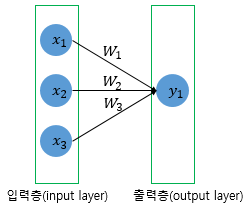

In [ ]:
#model summary : 모델 정보 요약
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            1232608   
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 1,242,766
Trainable params: 1,242,766
Non-trainable params: 0
_________________________________________________________________
None


### 컴파일 & 훈련


손실함수와 활성화 함수 조합

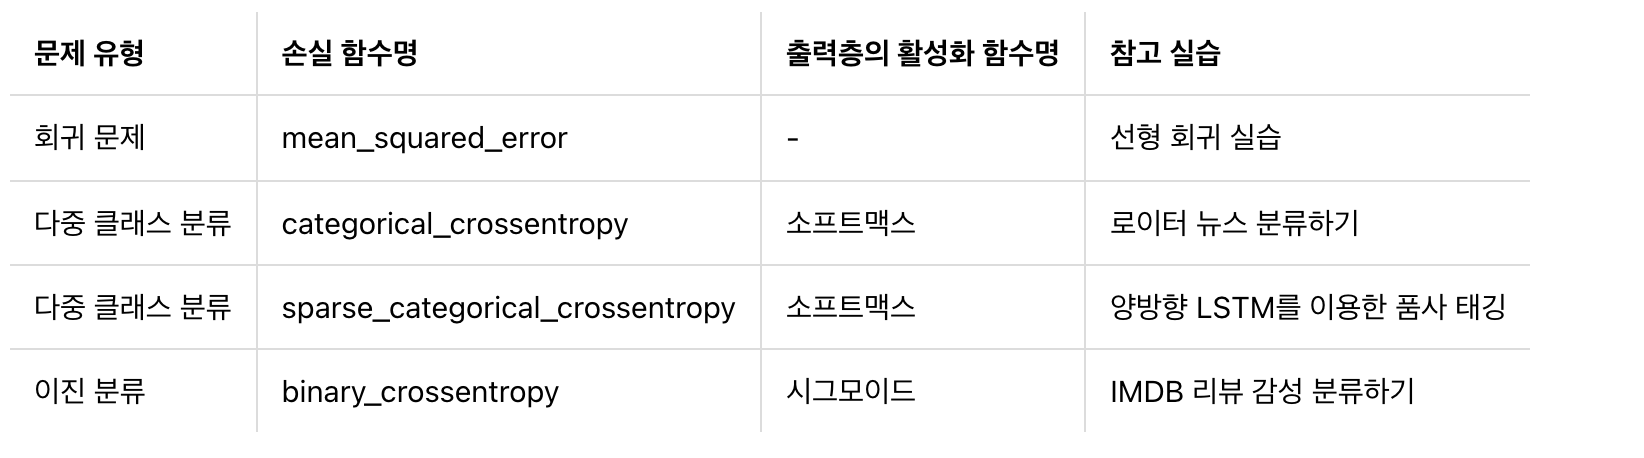

In [ ]:
# compile model
# https://89douner.tistory.com/274

model.compile(loss='sparse_categorical_crossentropy', #손실 함수
              optimizer='adam', #optimizer : Adam 최적화 알고리즘
              metrics=['accuracy']) #accuracy 를 지표로


#model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            1232608   
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 1,242,766
Trainable params: 1,242,766
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fit model(학습 진행)
num_epochs=30
history=model.fit(train_inputs, #훈련 데이터 X
                   labels, #레이블 데이터 labels=np.array(train['label'])
                   epochs=num_epochs, #학습 반복 주기
                   verbose=2, #0 = silent, 1 = progress bar, 2 = one line per epoch. (0,1,2 중 선택 )
                   validation_split = 0.2 ) #데이터셋 0.8 : 0.2 비율로 나누어 학습

Epoch 1/30
4358/4358 - 90s - loss: 0.9380 - accuracy: 0.8192 - val_loss: 0.8331 - val_accuracy: 0.8222 - 90s/epoch - 21ms/step
Epoch 2/30
4358/4358 - 86s - loss: 0.6961 - accuracy: 0.8334 - val_loss: 0.6622 - val_accuracy: 0.8403 - 86s/epoch - 20ms/step
Epoch 3/30
4358/4358 - 88s - loss: 0.5514 - accuracy: 0.8586 - val_loss: 0.5786 - val_accuracy: 0.8546 - 88s/epoch - 20ms/step
Epoch 4/30
4358/4358 - 88s - loss: 0.4616 - accuracy: 0.8770 - val_loss: 0.5435 - val_accuracy: 0.8659 - 88s/epoch - 20ms/step
Epoch 5/30
4358/4358 - 88s - loss: 0.3902 - accuracy: 0.8929 - val_loss: 0.5001 - val_accuracy: 0.8727 - 88s/epoch - 20ms/step
Epoch 6/30
4358/4358 - 90s - loss: 0.3345 - accuracy: 0.9045 - val_loss: 0.4793 - val_accuracy: 0.8775 - 90s/epoch - 21ms/step
Epoch 7/30
4358/4358 - 92s - loss: 0.2935 - accuracy: 0.9132 - val_loss: 0.4680 - val_accuracy: 0.8806 - 92s/epoch - 21ms/step
Epoch 8/30
4358/4358 - 89s - loss: 0.2610 - accuracy: 0.9220 - val_loss: 0.4734 - val_accuracy: 0.8867 - 89s/ep

### 예측 & 결과제출

In [ ]:
pred = model.predict(test_inputs)
pred = tf.argmax(pred,axis=1) #가장 큰 값의 인덱스를 반환 . #axis = 1 : 열 방향으로 |||0 이면 행방향

In [ ]:
sample['label'] = pred
sample
sample.to_csv('baseline1119.csv', index=False)